Support Vector Machines - COMPSCI 762

In [53]:
# Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.svm import SVC 
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, KFold

DS1

In [138]:
# Task 1
# Create a non-linearly separable dataset (varying C value impactful on non-linearly separable data)
def GenerateNonLinearlySeparableDatasetDS1(n):
    X, y = make_classification(n_samples=n, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1,
                            flip_y=0.1, class_sep=0.8, random_state=10)
    return X,y

def DS1(X,y):
    X_df = pd.DataFrame(data = X, columns = ['X1', 'X2'])
    y_df = pd.DataFrame(data = y, columns = ['y'])
    DS1 = pd.concat([X_df, y_df], axis = 1)
    DS1.to_csv('DS1.csv', index = False)
    

# Task 2
# Fit a linear SVM with fixed C value
def FitLinearSVM(C, X, y):
    svm = SVC(kernel='linear', C=C)
    svm.fit(X, y)
    return svm

# Plot DS1 with the decision boundary
def PlotDecisionBoundaries(C, X, y, svm, plot_title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svm.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, levels=[-1, 0, 1], colors='k', linestyles=['--', '-', '--'])
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    plt.title(plot_title)
    plt.show()

# Task 3
def LeaveOneOutCV(C, X, y, svm):
    loo = LeaveOneOut()
    train_accuracy = []
    test_accuracy = []

    for train_index, test_index in loo.split(X):
        
        #Iteratively include n-1 in training set and not include a single sample
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        #Retraining on n-1 samples
        svm.fit(X_train, y_train)
        
        #Prediciting the single sample 
        train_pred = svm.predict(X_train)
        test_pred = svm.predict(X_test)
        
        train_accuracy.append(accuracy_score(y_train, train_pred))
        test_accuracy.append(accuracy_score(y_test, test_pred))
        
    # Calculate average train and test performance
    train_performance = np.mean(train_accuracy)
    test_performance = np.mean(test_accuracy)

    print('SVM Performance Metrics using LOO Cross Validation with C={}'.format(C))
    print("Accuracy on Training Set: {:.2f}%".format(train_performance * 100))
    print("Accuracy on Testing Set: {:.2f}%".format(test_performance * 100))

    return train_performance, test_performance

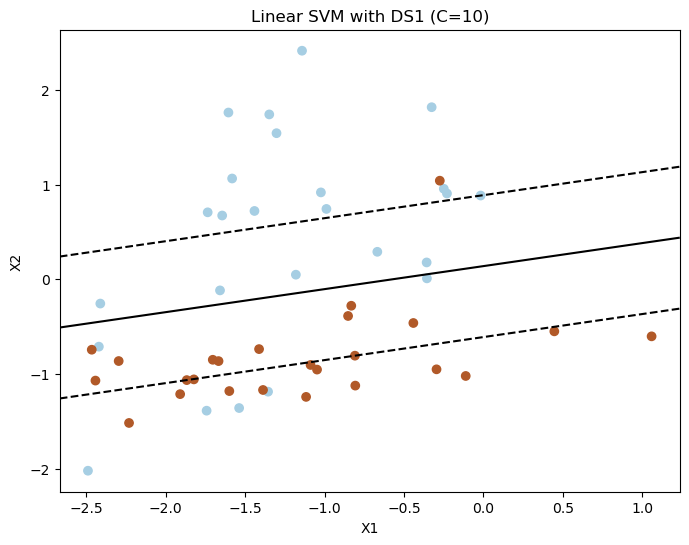

SVM Performance Metrics using LOO Cross Validation with C=10
Accuracy on Training Set: 86.29%
Accuracy on Testing Set: 82.00%


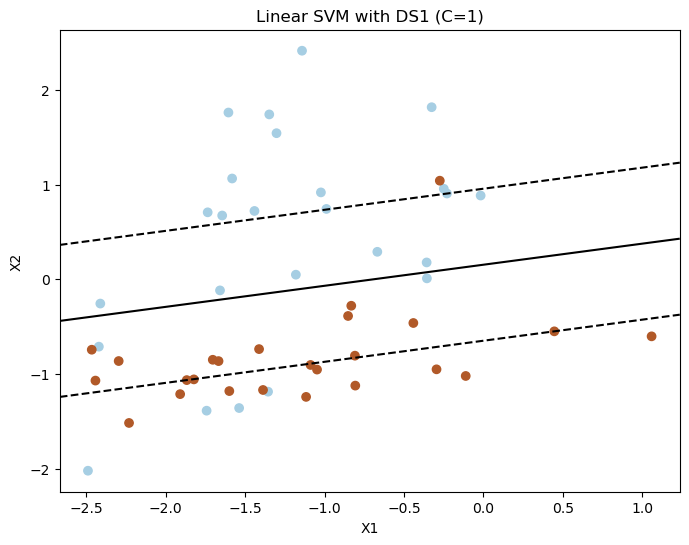

SVM Performance Metrics using LOO Cross Validation with C=1
Accuracy on Training Set: 86.04%
Accuracy on Testing Set: 86.00%


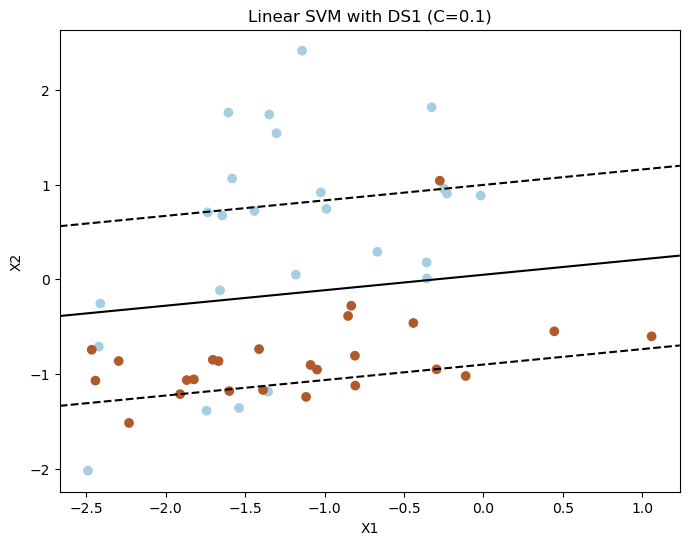

SVM Performance Metrics using LOO Cross Validation with C=0.1
Accuracy on Training Set: 87.10%
Accuracy on Testing Set: 84.00%


In [139]:
# Task 1
X,y = GenerateNonLinearlySeparableDatasetDS1(n = 50)
DS1(X,y)

# Task 2
C = 10
svm = FitLinearSVM(C, X, y)
PlotDecisionBoundaries(C, X, y, svm, plot_title = 'Linear SVM with DS1 (C={})'.format(C))

# Task 3
train_performance, test_performance = LeaveOneOutCV(C, X, y, svm)

# Task 4
C = 1
svm = FitLinearSVM(C, X, y)
PlotDecisionBoundaries(C, X, y, svm, plot_title = 'Linear SVM with DS1 (C={})'.format(C))
train_performance, test_performance = LeaveOneOutCV(C, X, y, svm)

C = 0.1
svm = FitLinearSVM(C, X, y)
PlotDecisionBoundaries(C, X, y, svm, plot_title = 'Linear SVM with DS1 (C={})'.format(C))
train_performance, test_performance = LeaveOneOutCV(C, X, y, svm)

Task 5 - Explain what C does and how it improved the SVM in this case

C is a hyper-parameter in SVM models that controls the misclassification rate tolerance by adjusting the margin. 

DS2

In [114]:
# Task 1
def ExploratoryAnalysis(DS2):
    plt.figure(figsize=(8, 6))
    plt.scatter(DS2[0], DS2[1])
    plt.scatter(DS2[0], DS2[1], c=DS2[2], cmap=plt.cm.Paired)
    plt.show()


# Task 2
def RBFSVM(gamma, X, y, C):
    svm = SVC(kernel='rbf', C=C, gamma=gamma)
    svm.fit(X, y)
    return svm

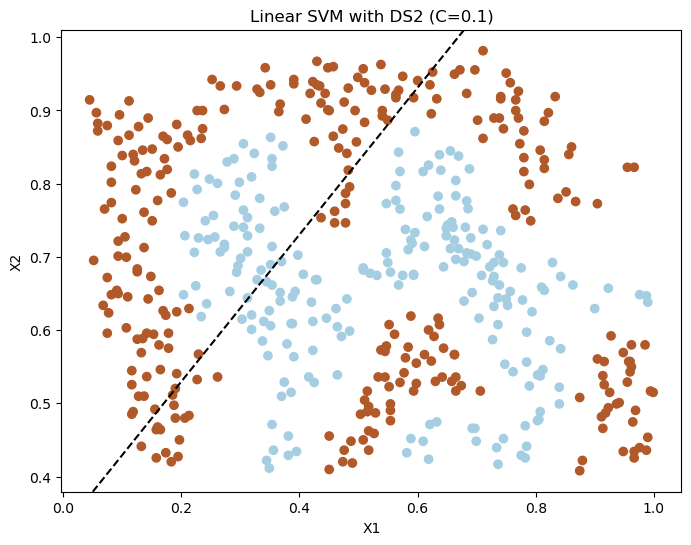

SVM Performance Metrics using LOO Cross Validation with C=0.1
Accuracy on Training Set: 57.40%
Accuracy on Testing Set: 57.40%


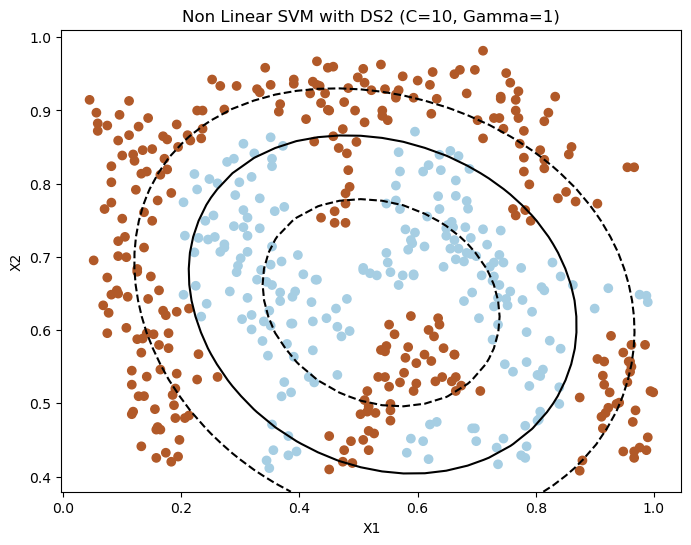

SVM Performance Metrics using LOO Cross Validation with C=10
Accuracy on Training Set: 80.34%
Accuracy on Testing Set: 79.60%


In [137]:
# Task 1
# Restructuring DS2 as model input
DS2 = pd.read_csv('D2.csv', header = None)
X, y = [0, 1], DS2[2]
X = DS2[X].values

C = 0.1
param_grid = {'C': [0.1, 1, 10]}
svm = FitLinearSVM(C, X, y)
PlotDecisionBoundaries(C, X, y, svm, plot_title = 'Linear SVM with DS2 (C={})'.format(C))
train_performance, test_performance = LeaveOneOutCV(C, X, y, svm)

# Task 2
C, gamma = 10, 1

svm = RBFSVM(gamma, X, y, C)
PlotDecisionBoundaries(C, X, y, svm, plot_title = ('Non Linear SVM with DS2 (C={}, Gamma={})'.format(C, gamma)))
train_performance, test_performance = LeaveOneOutCV(C, X, y, svm)

DS2 Task 3 - Explain which kernel you chose and why?

bhahahaha

DS3

In [132]:
# Task 2
def KFoldCV(X, y, param_grid, k):
    svm = SVC()

    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    grid_search = GridSearchCV(svm, param_grid, cv=kf)
    grid_search.fit(X, y)

    # Print the best hyperparameters and corresponding accuracy
    print("Best Hyperparameters: ", grid_search.best_params_)
    print("Accuracy on Testing Set using K-Fold CV: {:.2f}%".format(grid_search.best_score_ * 100))

    return grid_search.best_params_

def FitSVM(X, y, kernel, C):
    svm = SVC(kernel=kernel, C=C)
    svm.fit(X, y)
    return svm

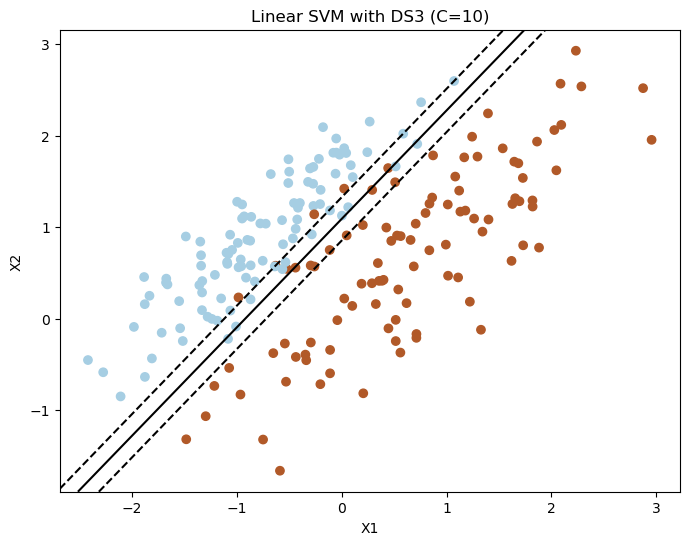

SVM Performance Metrics using LOO Cross Validation with C=10
Accuracy on Training Set: 95.50%
Accuracy on Testing Set: 94.50%


Best Hyperparameters:  {'C': 0.1, 'kernel': 'linear'}
Accuracy on Testing Set using K-Fold CV: 95.50%


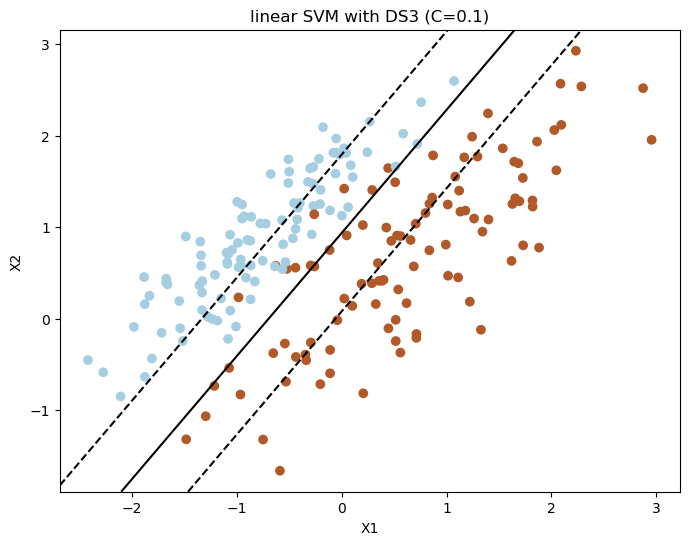

In [136]:
# Task 1
# Restructuring DS2 as model input
DS3 = pd.read_csv('D3.csv', header = None)
X, y = [0, 1], DS3[2]
X = DS3[X].values

C = 10
svm = FitLinearSVM(C, X, y)
PlotDecisionBoundaries(C, X, y, svm, plot_title = 'Linear SVM with DS3 (C={})'.format(C))
train_performance, test_performance = LeaveOneOutCV(C, X, y, svm)
print('\n')

# Task 2
# Optimising the following hyperparameters of SVM Models: C, Kernel
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']}

BestParameters = KFoldCV(X, y, param_grid, k = 5)
svm = FitSVM(X, y, BestParameters['kernel'], BestParameters['C'])
PlotDecisionBoundaries(C, X, y, svm, plot_title = ('{} SVM with DS3 (C={})'.format(BestParameters['kernel'], BestParameters['C'])))